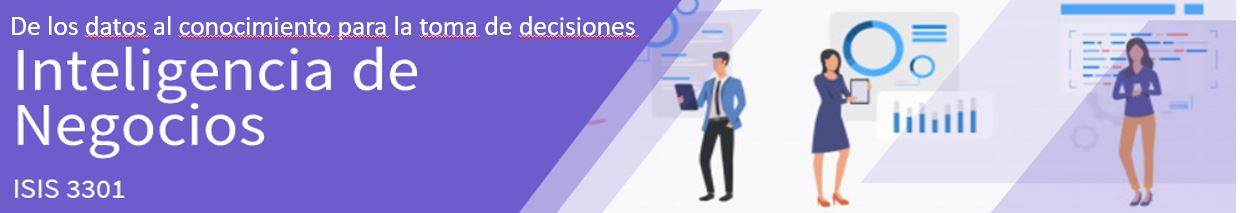

ESTUDIANTES:
-Juan Felipe Garcia
-Samuel Freire
-Lucciano Franco

# 1 Carga de librerias

In [123]:
%pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# 2. Carga de Datos

In [18]:
df_pc=pd.read_csv('./202320_Laboratorio 2 - Regresión_data_laptop_data_train.csv',sep=",", encoding = "ISO-8859-1")

# 3.Entendimiento de los datos

In [19]:
df_pc.shape

(1216, 14)

In [20]:
df_pc.head()

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows


In [128]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [129]:
df_movies.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


In [130]:
df_movies.dtypes

#                    int64
index                int64
tconst              object
titleType           object
originalTitle       object
isAdult            float64
startYear          float64
runtimeMinutes      object
averageRating      float64
numVotes           float64
ordering           float64
region              object
language            object
types               object
attributes          object
isOriginalTitle    float64
main_genre          object
secondary_genre     object
dtype: object

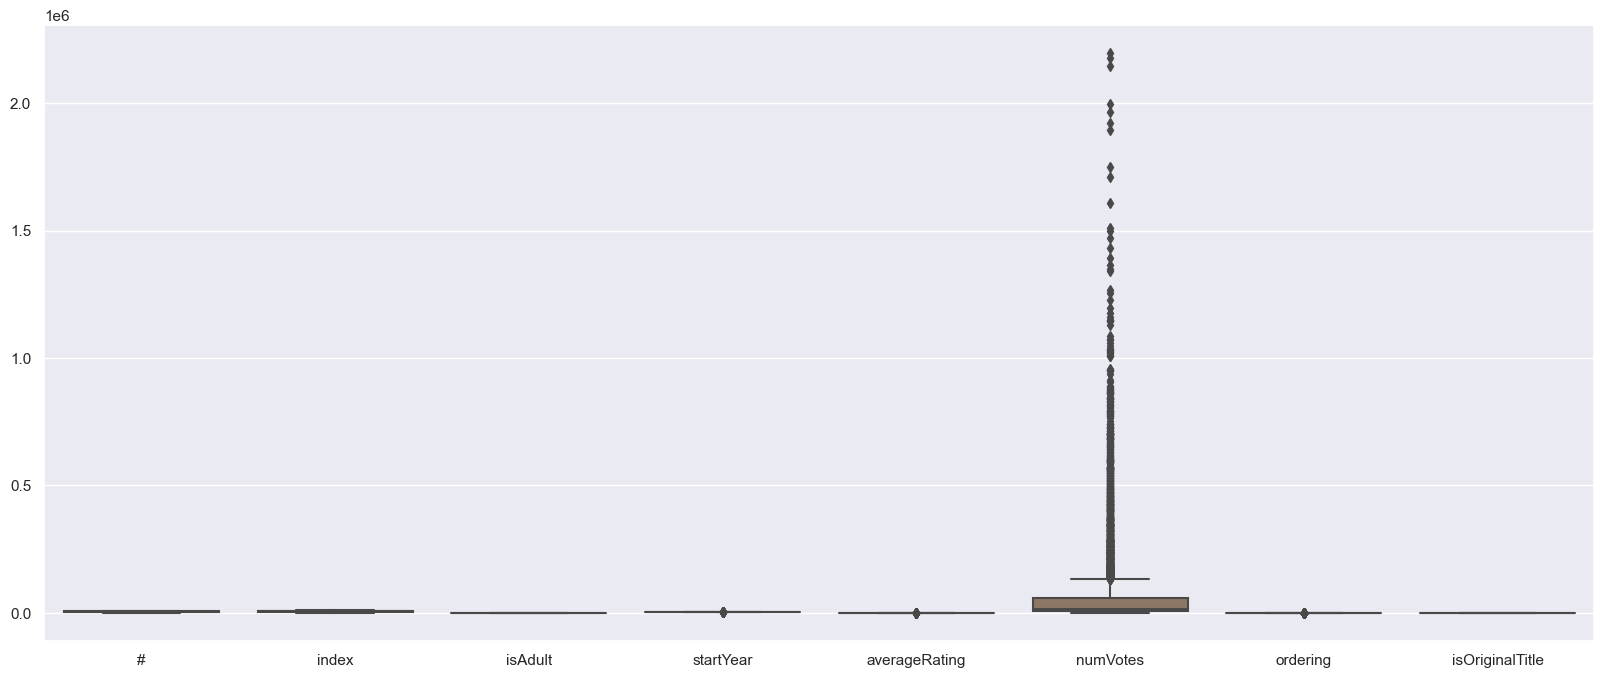

In [131]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies, orient="v")

Puedes ver las variables con dominios similares para entenderlas mejor. 
En este caso podrías quitar Speed_limit.

In [132]:
name_cols_float = df_movies.select_dtypes(include = ['float']).columns
name_cols_int = df_movies.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['#', 'index'], dtype='object')

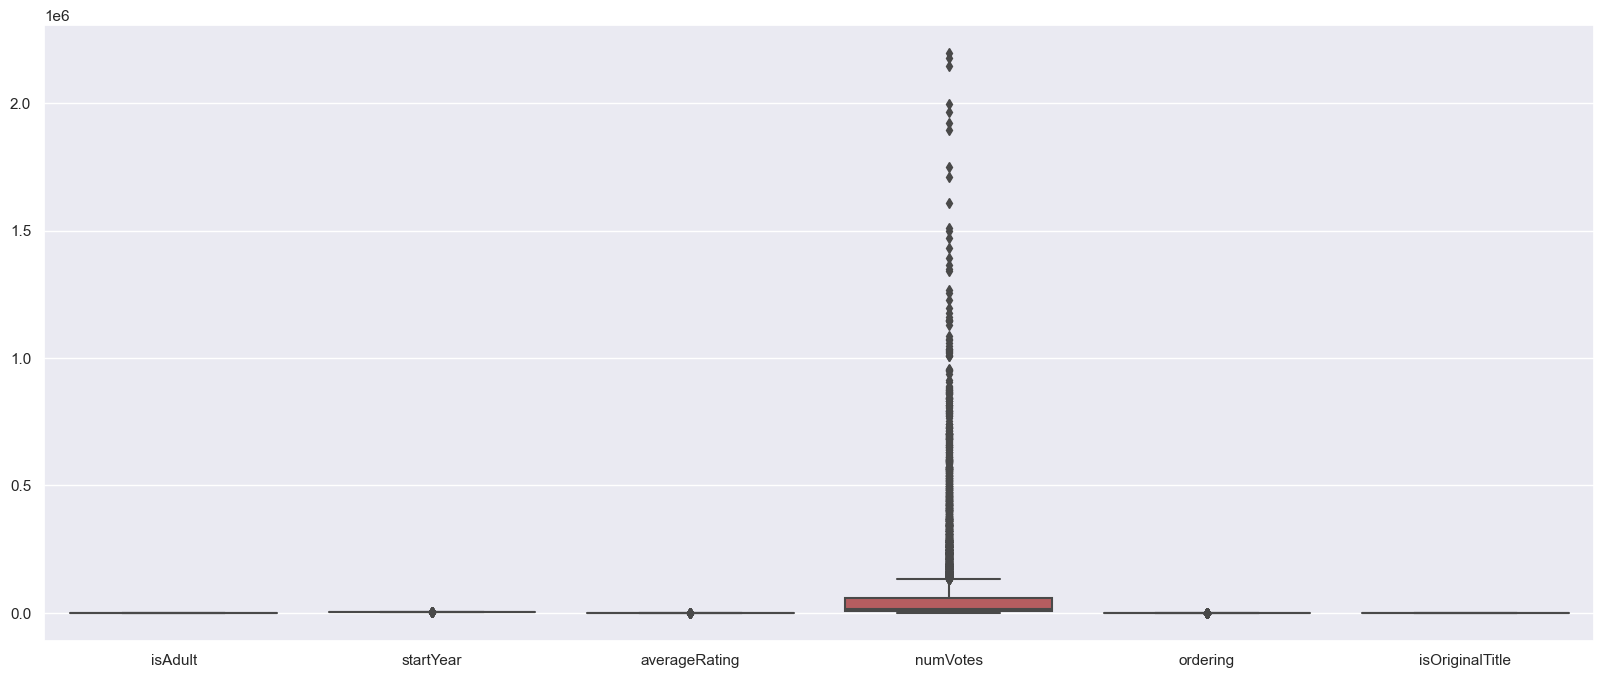

In [133]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_float], orient="v")

En el anterior grafico se ve que hay datos en numVotes que son muy altos esto quiere decir que el numero de votos que obtuvo esta pelicula fue muy alta

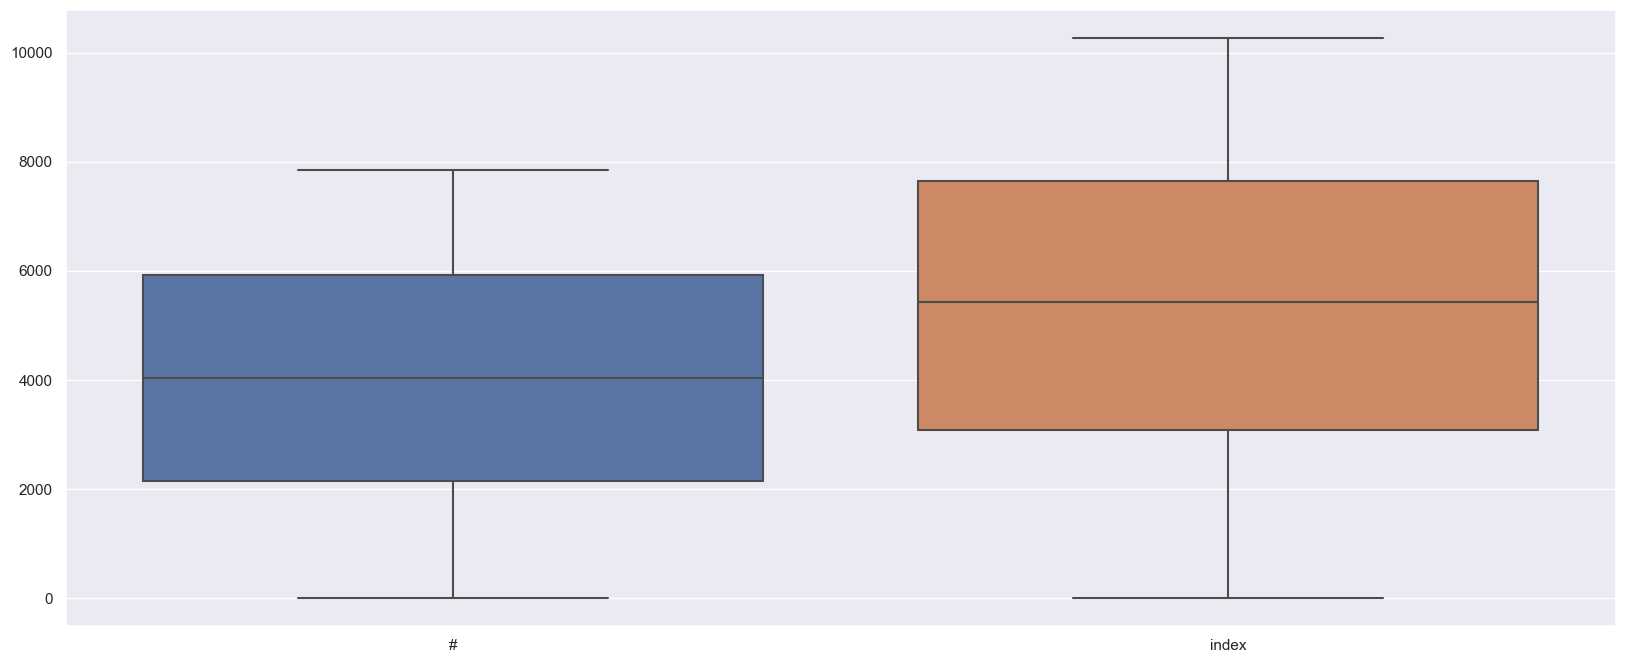

In [134]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_int], orient="v")

In [135]:
name_cols_non_number = df_movies.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

In [136]:
df_movies[name_cols_non_number].describe()

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0395843,movie,Home,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


In [137]:
# Revisamos en detalle el contenido de la columna Time
df_movies.main_genre.value_counts()

Drama          1767
Comedy         1615
Action         1571
Crime           867
Biography       597
Adventure       440
Documentary     297
Animation       144
Horror           63
Reality-TV       24
Mystery          21
Fantasy          14
Game-Show        13
Thriller         10
Romance           9
Music             5
Family            4
Talk-Show         3
Sci-Fi            2
History           2
Sport             1
Musical           1
Name: main_genre, dtype: int64

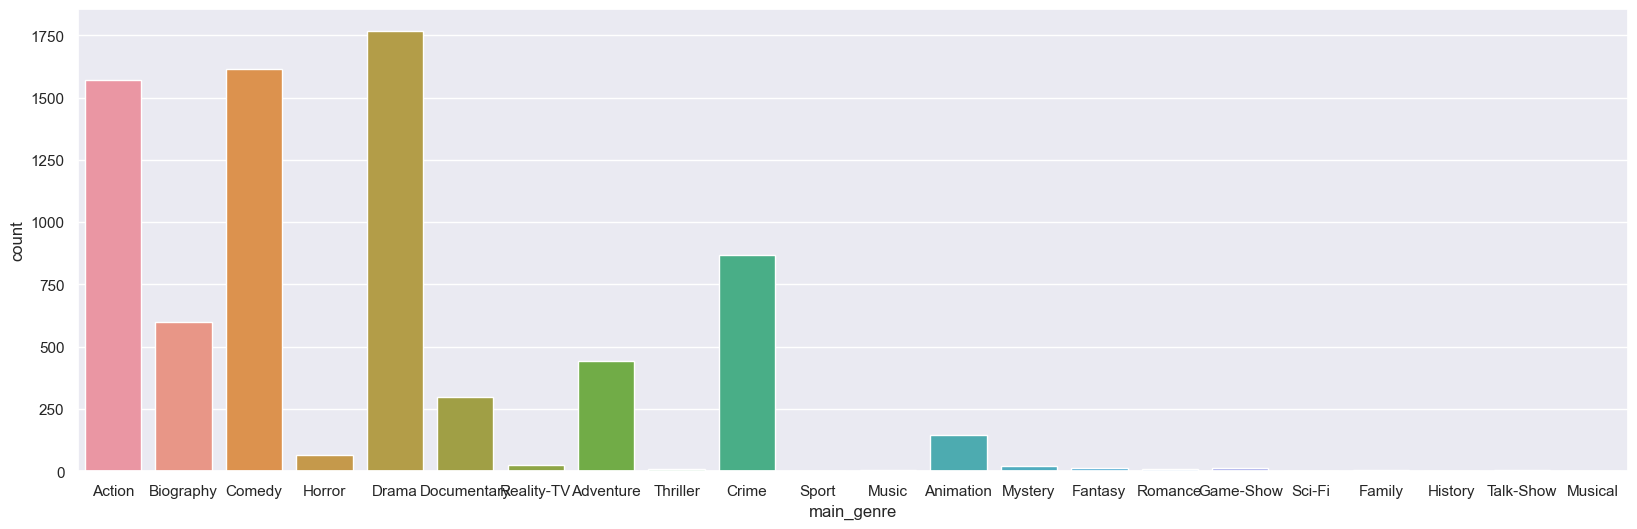

In [138]:
plt.figure(figsize=(20, 6))  
ax = sns.countplot(x='main_genre', data=df_movies)

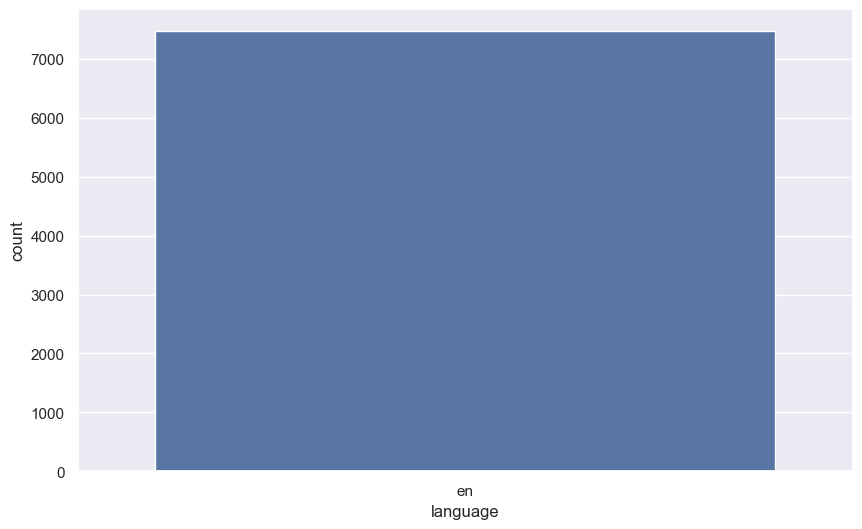

In [139]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='language', data=df_movies)

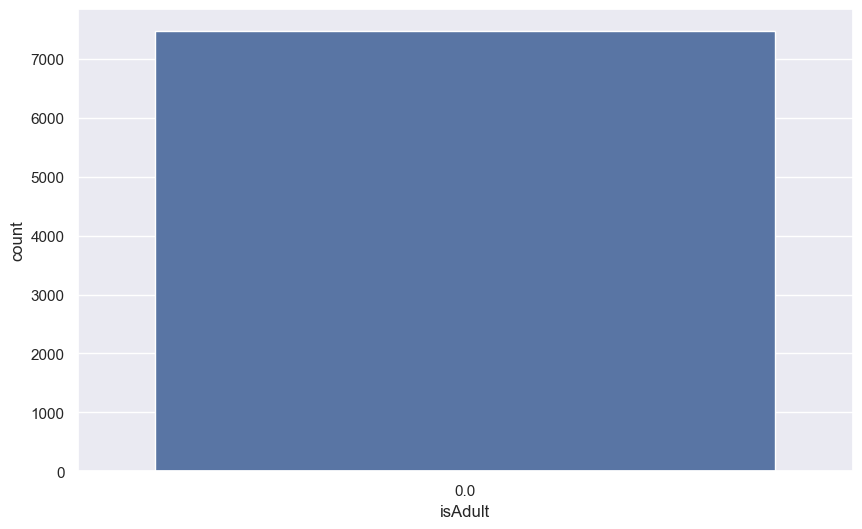

In [140]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='isAdult', data=df_movies)

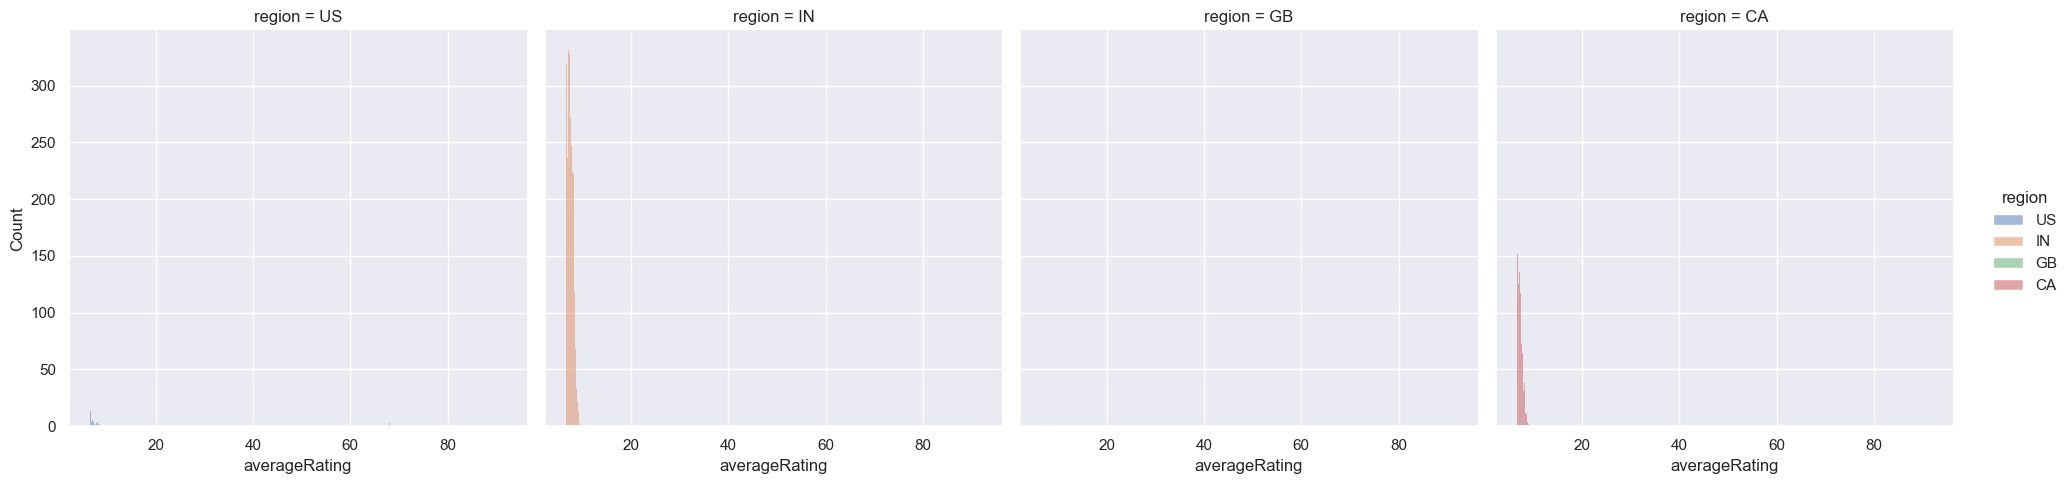

In [141]:
#Observar las distribuciones de "Accident_Severity" por cada valor de Time
sns.displot(data=df_movies, x="averageRating", hue="region", col="region")

In [142]:
df_movies

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,7845,10269,tt9789686,movie,Un rubio,0.0,2019.0,108,7.3,3779.0,11.0,CA,en,imdbDisplay,\N,0.0,Drama,Romance
7467,7846,10270,tt9814900,tvSeries,Trailer Park Boys: The Animated Series,0.0,2019.0,25,7.5,3318.0,4.0,CA,en,imdbDisplay,\N,0.0,Animation,Comedy
7468,7847,10271,tt9845110,movie,Deux,0.0,2019.0,99,7.2,3346.0,29.0,CA,en,imdbDisplay,\N,0.0,Drama,Romance
7469,7848,10272,tt9845398,movie,Fin de siglo,0.0,2019.0,84,6.9,3646.0,6.0,CA,en,imdbDisplay,\N,0.0,Drama,No tiene


In [143]:
#Supongamos que los expertos quieren ver relaciones entre las variables: "Time","Number_of_Casualties","Day_of_Week","Speed_limit", "Light_Conditions"
cols_select=["startYear","numVotes","averageRating", "runtimeMinutes"]
df_movies_cols_sels=df_movies[cols_select].copy()

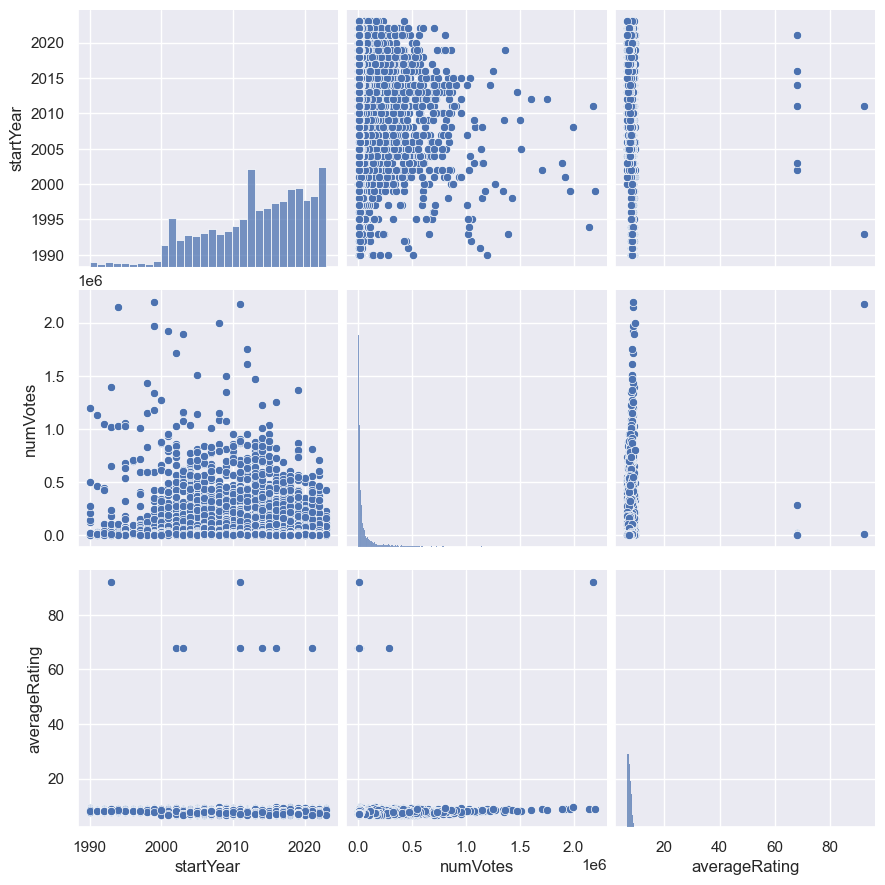

In [144]:
#Vámos las relaciones entre todas las variables numércias
sns.pairplot(df_movies_cols_sels, height=3,kind='scatter')

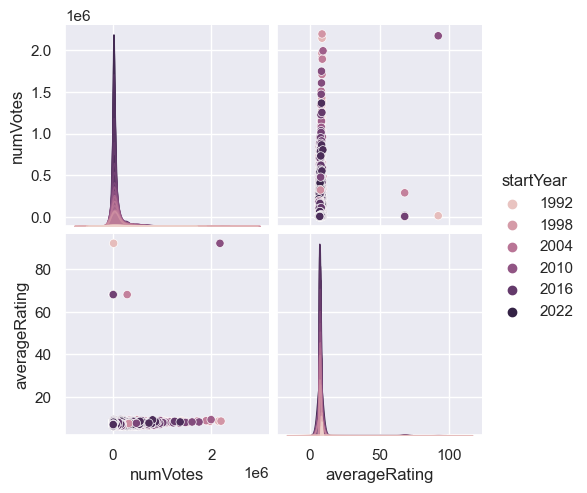

In [145]:
# En esta gráfica van a ver las relaciones entre Time y las otras variables numéricas
sns.pairplot(data=df_movies_cols_sels, hue="startYear")

### 3.1 Entendimiento de los datos

**Análisis** 
1. Existen multiples valores que no tienen significado en el diccionario o que no se consideran relevantes como # y el index que seran tratados en un apartado anteriror.
2. Antes del año 2000 en start year se ve que no existe ninguna valoracion por debajo de 7,7 por lo que se puede decir que estos valores faltan o que antes de ese año esa era la minima calificacion.
3. Todos los lenguajes seleccionados son en ingles por lo que se podria obviar esta columna al no ser un factor diferenciador en el analisis, se cree que todos son en ingles debido a la region a las que estan asociadas.
4. Lo mismo que sucede con lenguajes sucede con isAdult en esta columna todos los valores son 0 por lo que se podria obviar.
5. En cuanto al tipo de datos de las columnas, existen dos columna que no tienen el tipo mencionada en el diccionario por lo que esto se arreglara mas adelante.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que se deben realizar en la etapa de preparación, antes de generar un modelo de agrupación.

In [146]:
#Consulto una muestra de datos para analizarlos mejor
df_movies[name_cols_non_number].sample(15)

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
5531,tt9225192,movie,Seongnan hwangso,116,IN,en,imdbDisplay,\N,Action,Crime
906,tt0436697,movie,The Queen,103,IN,en,imdbDisplay,\N,Biography,Drama
677,tt0366840,movie,Okkadu,171,IN,en,imdbDisplay,\N,Action,Drama
6841,tt2328813,movie,Trudno byt bogom,177,CA,en,imdbDisplay,\N,Drama,Sci-Fi
3717,tt3029556,movie,RurÃÂ´ni Kenshin: Densetsu no saigo-hen,134,IN,en,imdbDisplay,\N,Action,Adventure
4141,tt4378456,tvSeries,Second Chance,42,IN,en,imdbDisplay,\N,Drama,Sci-Fi
887,tt0429493,movie,The A-Team,117,IN,en,imdbDisplay,\N,Action,Adventure
3156,tt2007387,movie,Go-ji-jeon,133,IN,en,imdbDisplay,\N,Action,Drama
3040,tt1871731,tvSeries,Ninjago: Masters of Spinjitzu,30,IN,en,imdbDisplay,\N,Action,Adventure
6753,tt1969062,movie,Infinitely Polar Bear,90,CA,en,imdbDisplay,\N,Comedy,Drama


### 3.2. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. Esta actividad la hicimos en el notebook de entendimiento de datos y acá retomaremos los elementos más importantes, para ilustrar el concepto.

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [147]:
# Cálculo de porcentaje de valores nulos por columna
((df_movies.isnull().sum()/df_movies.shape[0])).sort_values(ascending=False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

Como se ve en la anterior no hay ninguna columna completamente en null pero si hay columnas que no aparecen en el diccionario por lo que estas se toman como candidatas para ser eliminadas.

Hay varias columnas que tienen un 0.000134 porciento de datos nulos por lo que al ser un mismo porcentaje se sospecha que pueda ser una misma fila, y del mismo modo al ser un numero tan pequeño se considerara en rellenar la informacion con algun valor constante como puede ser la media por ejemplo.


### 3.2.2 Unicidad

In [148]:
df_movies.duplicated(keep = False).sum()

6

In [149]:

df_movies["tconst"].duplicated(keep = False).sum()


10

En este caso existen valores duplicados, en tconst existen valores duplicados lo cual no tendria que suceder ya que este es el ID de cada uno de los datos por lo que es un claro candidato a ser eliminado. 

Aparte de esto existen 6 filas duplicadas por lo que estas seran candidatas para se eliminadas al ser un numero muy pequeño.

### 3.2.3 Consistencia

In [150]:
df_movies.dtypes

#                    int64
index                int64
tconst              object
titleType           object
originalTitle       object
isAdult            float64
startYear          float64
runtimeMinutes      object
averageRating      float64
numVotes           float64
ordering           float64
region              object
language            object
types               object
attributes          object
isOriginalTitle    float64
main_genre          object
secondary_genre     object
dtype: object

In [151]:

df_movies["titleType"].value_counts()

movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64

In [152]:
# Revisamos por ejemplo, los valores de la variable categórica Day_of_Week 
df_movies["runtimeMinutes"].describe()

count     7470
unique     362
top         60
freq       534
Name: runtimeMinutes, dtype: object

En este apartado se pueden diferenciar varios problemas de con la consistencia, en el apartado de titleType existen distintas escrituras para el valor Movie por lo que es importante revisarlo mas tarde y validar los que estan mal escritos.

Del mismo modo el tipo de unas columnas esta mal por lo que se revisara el problema mas tarde, un ejemplo de esto es la columna runtimeMinutes. 

### 3.2.4 Validez

In [153]:
df_movies["isAdult"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isAdult, Length: 7471, dtype: float64

En este caso podemos revisar que la columna is Adult en su defecto no aporta nigunga informacion para el analsis

In [154]:
df_movies["averageRating"].max()

92.0

En eset caso vemos que el maximo valor de la columna average Rating esta porfuera de lo que se menciono en elñ diccionario asi qeu en este caso seria invalido usar este valor

In [155]:
df_movies["language"]

0       en
1       en
2       en
3       en
4       en
        ..
7466    en
7467    en
7468    en
7469    en
7470    en
Name: language, Length: 7471, dtype: object

En este caso vemos qeu nuevamente toda la columna dde lenguaje sucede lo mismo no aporta nada al analsisi

In [156]:
df_movies["isOriginalTitle"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isOriginalTitle, Length: 7471, dtype: float64

En este caso vemos qeu nuevamente toda la columna dde lenguaje sucede lo mismo no aporta nada al analsis

Existen valores en averageRating que no funcionan del modo que deberian ya que el rango deberia ser de 0 a 10 con decimales y hay valores que se pasan de este valor, por lo que esto tendra que cambiarse mas adelante. Por ejemplo como se ve arriba el maximo valor es 92. Aparte de esto la validez de los datos de isAdult es bastante poca ya que todos los valores son el mismo. Algo similar sucede en el caso de la columa language y originaltype

### 3.3 Manipulacion de datos

### 3.3.1 Prepara datos


Hay filas con atributos que no coinciden con el tipo de diccionario debido a esto deben ser cambiados


En este caso los datos son tconst y runtimeMinutes 

In [157]:
df_movies['newruntimeMinutes'] = pd.to_numeric(df_movies.runtimeMinutes, errors = 'coerce')
df_movies['newruntimeMinutes'].tail(10)

7461    116.0
7462    113.0
7463     30.0
7464    106.0
7465    102.0
7466    108.0
7467     25.0
7468     99.0
7469     84.0
7470     23.0
Name: newruntimeMinutes, dtype: float64

In [158]:
df_movies.head()
df_movies.dtypes
df_movies["newruntimeMinutes"].describe

<bound method NDFrame.describe of 0       137.0
1        22.0
2       150.0
3       120.0
4       132.0
        ...  
7466    108.0
7467     25.0
7468     99.0
7469     84.0
7470     23.0
Name: newruntimeMinutes, Length: 7471, dtype: float64>

In [159]:
df_movies['tconst'] = df_movies['tconst'].str.replace('tt', '').astype('int64')
df_movies['tconst'].tail(10)

7461    9617716
7462    9647768
7463    9698520
7464    9708358
7465    9789042
7466    9789686
7467    9814900
7468    9845110
7469    9845398
7470    9908860
Name: tconst, dtype: int64

In [160]:
df_movies.dtypes

#                      int64
index                  int64
tconst                 int64
titleType             object
originalTitle         object
isAdult              float64
startYear            float64
runtimeMinutes        object
averageRating        float64
numVotes             float64
ordering             float64
region                object
language              object
types                 object
attributes            object
isOriginalTitle      float64
main_genre            object
secondary_genre       object
newruntimeMinutes    float64
dtype: object

Aparte de los mencionados anteriormente  la columna avarageRating tiene numero que se estan evaluando del 1 al 100 no del 1 al 10 con decimales por lo que esto es necesario ajustarlo

In [161]:
def ajustar_valor(valor):
    if valor > 10:
        return round(valor / 10, 1)  # Dividir por 10 y redondear a un decimal
    else:
        return valor

df_movies['averageRating'] = df_movies['averageRating'].apply(ajustar_valor)

En titleType hay valores que son de tipo Movie pero escrito de distintos modos, debido a esto
es necesario cambiarlo para que no existan distintos tipos de Movie.

In [162]:
df_movies['titleType'] = np.where(df_movies['titleType'].str.match(r'(?i)^.*movie$'), 'Movie', df_movies['titleType'])

#### Eliminar columnas que no tienen utilidad para el análisis de los datos

In [163]:
df_movies = df_movies.drop('attributes', axis=1)
df_movies = df_movies.drop('isOriginalTitle', axis=1)
df_movies = df_movies.drop('#', axis=1)
df_movies = df_movies.drop('index', axis=1)
df_movies = df_movies.drop('isAdult', axis=1)
df_movies = df_movies.drop('language', axis=1)
df_movies = df_movies.drop('ordering', axis=1)



Las razon por la que las columnas se quitaron es porque no tenian una utilidad clara o porque no estaban en el diccionario(o ambas):

"#": no se aclara que es lo que hace la columnas y se puede pensar que son numeros sueltos sin un sentido  claro.

"index": mismo razonamiento que "#"
    
"isAdult": isAdult puede que fuese relevante si no todos los valores fueran 0, se cree que hay valores que son distintos a 0 realmente por lo se cree que la columna esta mal y de igual modo si esta correcta es irrelevante para el analisis de datos

"isOriginalTitle": mismo razonamiento que isAdult

"language": del mismo modo que isAdult todos los valores son iguales por lo que no se considera relevante para el analisis de datos.

"Attribute": Se hizo el mismo razonamiento que para isAdult, todos los datos son \N por lo que se considera que no es relevante para el analisis de datos

In [164]:
df_movies.head()

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre,newruntimeMinutes
0,103064,Movie,Terminator 2: Judgment Day,1991.0,137,8.6,1128166.0,US,dvd,Action,Sci-Fi,137.0
1,231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,2000.0,22,6.6,577.0,US,alternative,Action,Adventure,22.0
2,253474,Movie,The Pianist,2002.0,150,8.5,860569.0,US,imdbDisplay,Biography,Drama,150.0
3,369339,Movie,Collateral,2004.0,120,7.5,417391.0,US,imdbDisplay,Action,Crime,120.0
4,439547,Movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,2005.0,132,6.9,5946.0,US,imdbDisplay,Biography,Drama,132.0


Quitar datos duplicados:

In [165]:
df_movies["tconst"].duplicated(keep = False).sum()

10

In [166]:
df_movies.drop_duplicates(subset = ['tconst'])

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre,newruntimeMinutes
0,103064,Movie,Terminator 2: Judgment Day,1991.0,137,8.6,1128166.0,US,dvd,Action,Sci-Fi,137.0
1,231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,2000.0,22,6.6,577.0,US,alternative,Action,Adventure,22.0
2,253474,Movie,The Pianist,2002.0,150,8.5,860569.0,US,imdbDisplay,Biography,Drama,150.0
3,369339,Movie,Collateral,2004.0,120,7.5,417391.0,US,imdbDisplay,Action,Crime,120.0
4,439547,Movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,2005.0,132,6.9,5946.0,US,imdbDisplay,Biography,Drama,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7466,9789686,Movie,Un rubio,2019.0,108,7.3,3779.0,CA,imdbDisplay,Drama,Romance,108.0
7467,9814900,tvSeries,Trailer Park Boys: The Animated Series,2019.0,25,7.5,3318.0,CA,imdbDisplay,Animation,Comedy,25.0
7468,9845110,Movie,Deux,2019.0,99,7.2,3346.0,CA,imdbDisplay,Drama,Romance,99.0
7469,9845398,Movie,Fin de siglo,2019.0,84,6.9,3646.0,CA,imdbDisplay,Drama,No tiene,84.0


In [167]:
df_movies.duplicated(subset=["tconst"]).sum()

5

Quitar NaN

In [168]:
media_colaverage = df_movies['averageRating'].mean()
df_movies['averageRating'].fillna(media_colaverage, inplace=True)

media_colvotos = df_movies['numVotes'].mean()
df_movies['numVotes'].fillna(media_colvotos, inplace=True)

hay_nans = df_movies["numVotes"].isna().any()
print(hay_nans)

False


In [169]:
media_colaverage = df_movies['newruntimeMinutes'].mean()
df_movies['newruntimeMinutes'].fillna(media_colaverage, inplace=True)

hay_nans = df_movies["newruntimeMinutes"].isna().any()
print(hay_nans)

False


<Axes: xlabel='newruntimeMinutes', ylabel='numVotes'>

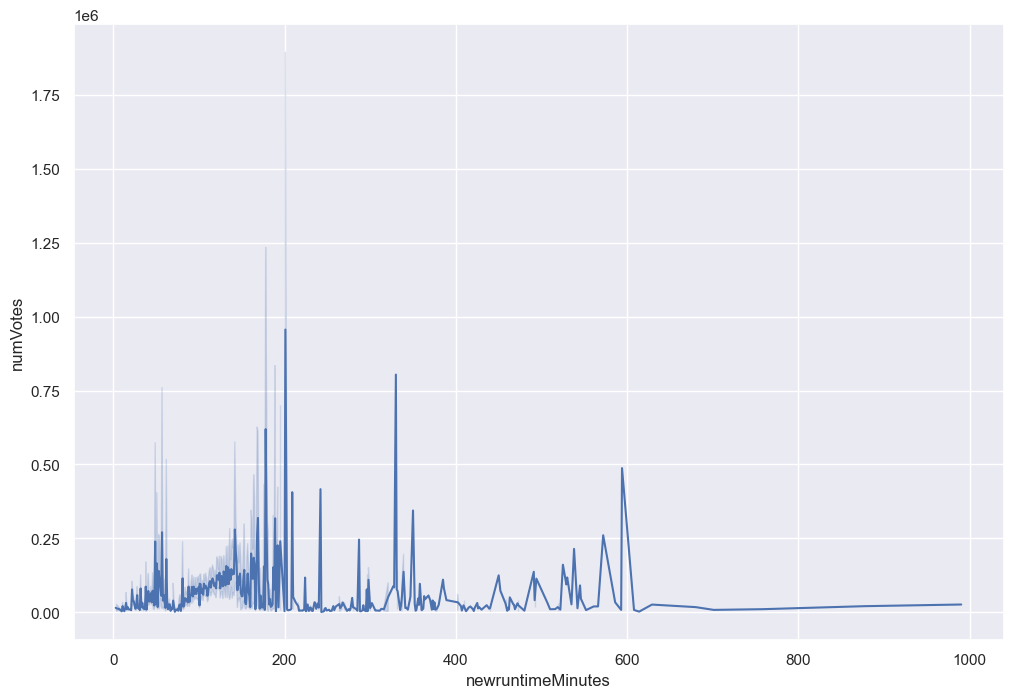

In [170]:
fig=plt.figure(figsize=(12,8))
sns.lineplot(data = df_movies, x = 'newruntimeMinutes', y = 'numVotes')

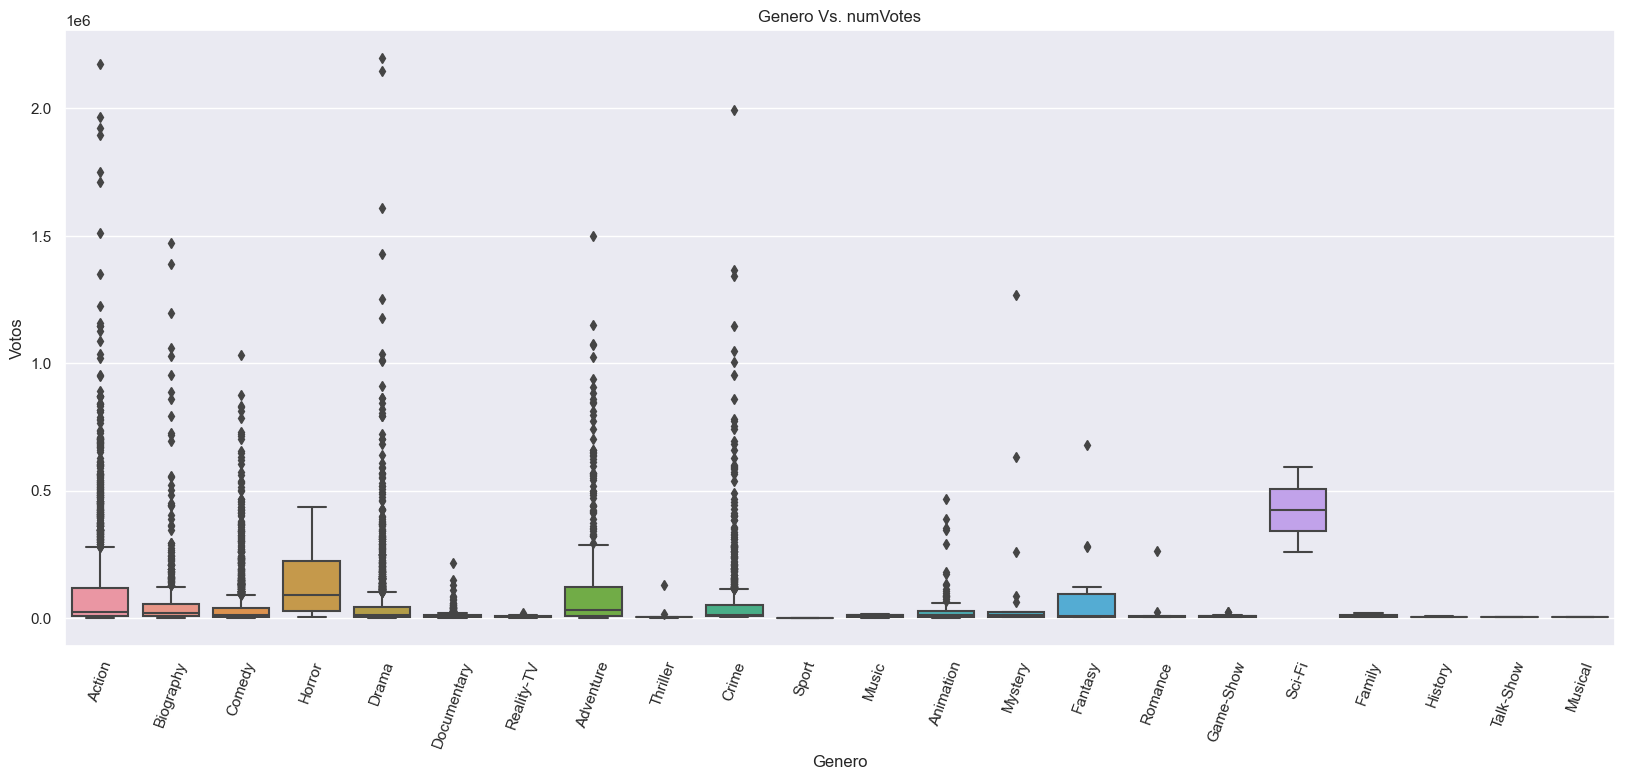

In [171]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="main_genre", y="numVotes", data=df_movies)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('Genero Vs. numVotes')
plt.xlabel('Genero')  
plt.ylabel('Votos')  
plt.show()

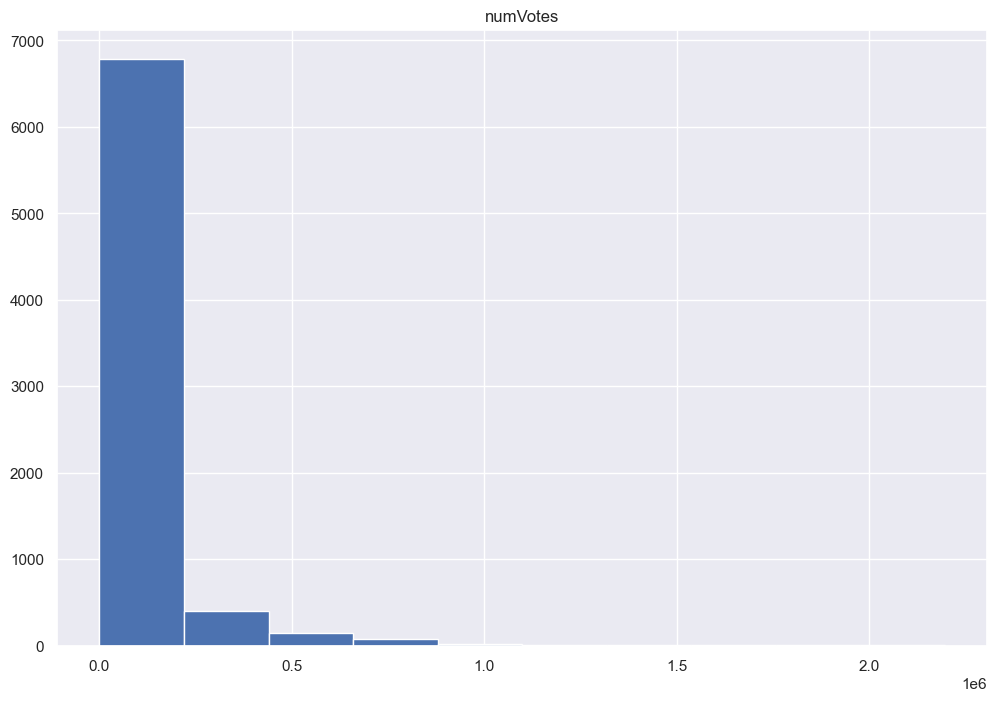

In [172]:
plt.figure(figsize = (12, 8))
plt.hist(df_movies['numVotes'], bins = 10)
plt.title('numVotes')  
plt.show()

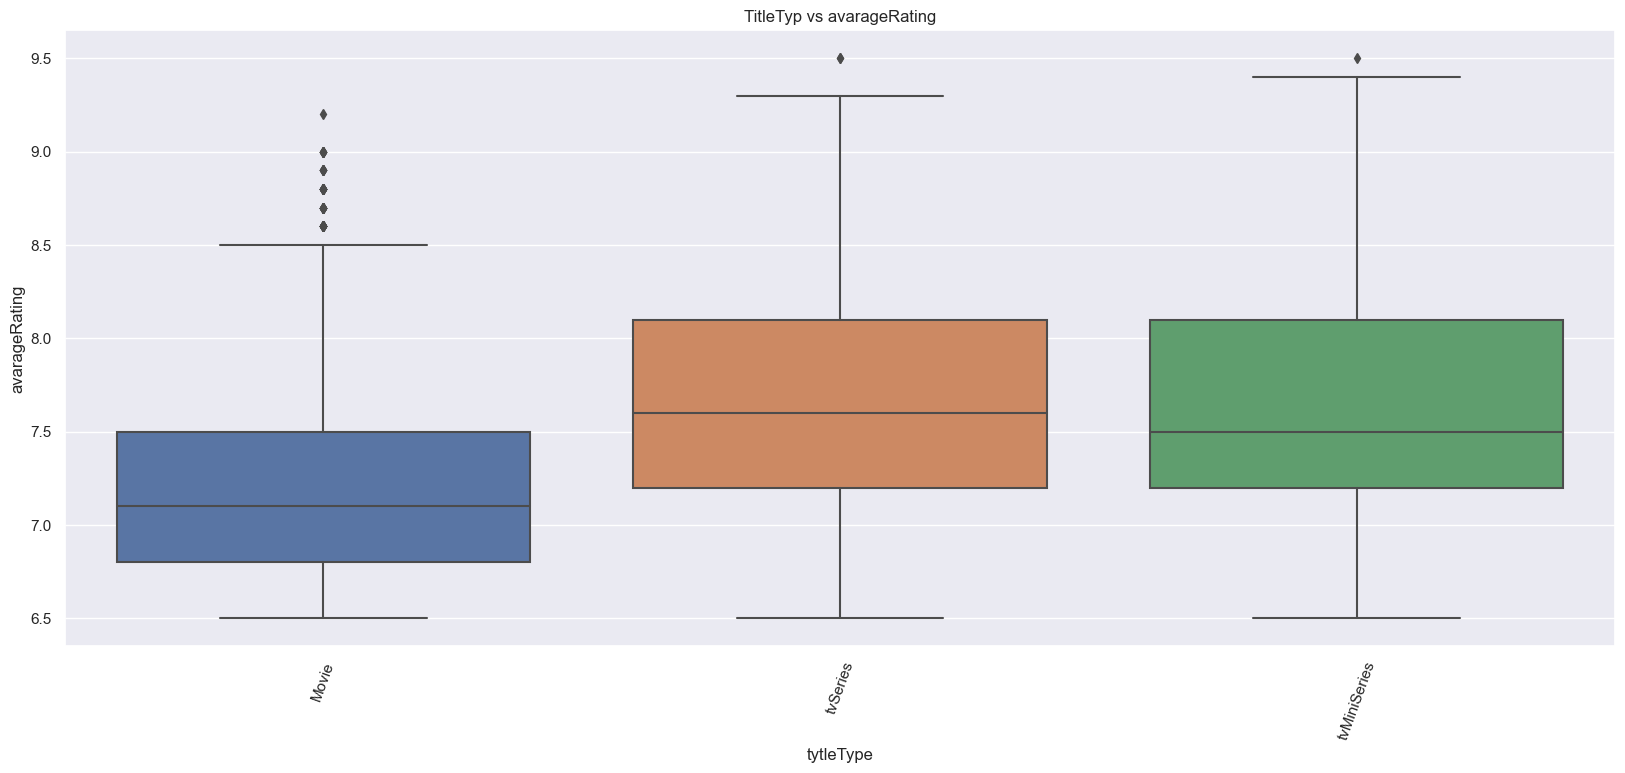

In [173]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="titleType", y="averageRating", data=df_movies)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('TitleTyp vs avarageRating')
plt.xlabel('tytleType')  
plt.ylabel('avarageRating')  
plt.show()